In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Feature(X) represents the number of study hours and Target(Y) represents whether a student passed (1) or failed(0)

# sample dataset: Study Hours vs. Pass/Fail (Binary Classification)
X = np.array([[1],[2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass

In [9]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
# Make Predictions

y_pred = model.predict(X_test)
print("Predictions:",y_pred)

Predictions: [1 0]


In [15]:
# Evaluate the Model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


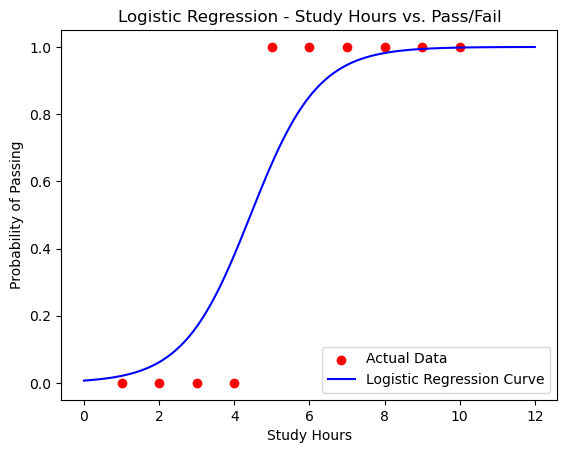

In [21]:
# Visualize the Logistic Regression Curve

#Generate values for plotting
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1] #get probability of class 1
plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X_range, y_prob, color="blue", label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression - Study Hours vs. Pass/Fail")
plt.legend()
plt.show()          

***heart dataset - to predict whether a patient has heart disease or not***

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [27]:
df = pd.read_csv("heart.csv")
df.head()                 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
# Exploratory Data Analysis(EDA)

# checking for null values
print(df.isnull().sum())

print(df.describe())

print(df.info())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  

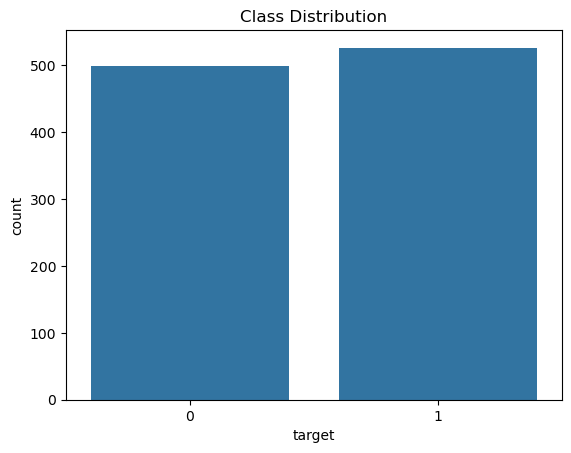

In [35]:
# visualization
sns.countplot(x=df['target'])
plt.title("Class Distribution")
plt.show()

In [39]:
# Feature Selection and Preprocessing

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Make predictions & Evaluate the Model

y_pred = model.predict(X_test)
print("Predictions:",y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]
Accuracy: 0.80



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



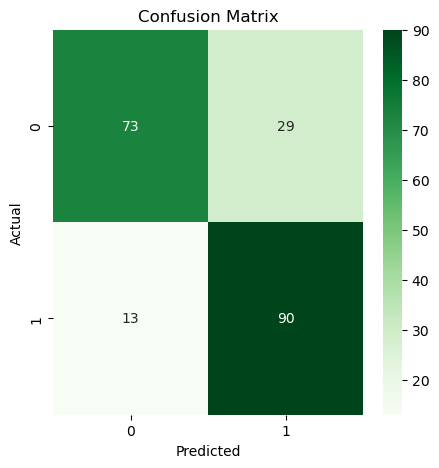

In [79]:
# Visualize the Logistic Regression Curve

print("\nClassification Report:\n",classification_report(y_test, y_pred))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()